# Chapter 8: Bayesian Inference

## Monte Carlo Methods

Final value : 0.49


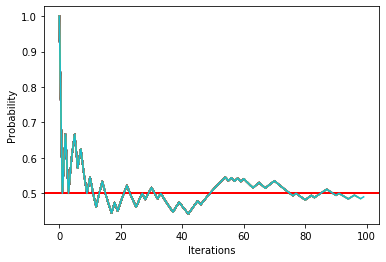

In [2]:
#Import required libraries  
import random  
import matplotlib.pyplot as plt  
  
#Let Heads = 0 and Tails = 1  
#Definition of function that randomly gives us either 0 or 1 as the output.   
def coin_flip():  
    return random.randint(0,1)   
      
#Check the return value of coin_flip()  
coin_flip()  
  
#Monte Carlo Simulation  
#Empty list to store the probability values.  
list1 = []  
  
def monte_carlo(n):  
    results = 0  
    for i in range(n):  
        flip_result = coin_flip()  
        results = results + flip_result  
          
        #Calculating probability value:  
        prob_value = results/(i+1)  
          
        #Append the probability values to the list:  
        list1.append(prob_value)  
  
        #Plot the results:  
        plt.axhline(y=0.5, color='r', linestyle='-')  
        plt.xlabel("Iterations")  
        plt.ylabel("Probability")  
        plt.plot(list1)  
         
    return results/n  
      
#Calling the function:  
 
answer = monte_carlo(100)  
print("Final value :",answer)  


## Maximum a Posteriori (MAP) Estimation

In [3]:
import pymc3 as pm  
import numpy as np  
  
# True parameter values  
alpha, sigma = 1, 1  
beta = [1, 2.5]  
  
# Size of dataset  
size = 100  
  
# Predictor variable  
X1 = np.random.randn(size)  
X2 = np.random.randn(size) * 0.2  
  
# Simulate outcome variable  
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma  
  
# Initialize a PyMC model  
basic_model = pm.Model()  
  
# Define model parameters  
with basic_model:  
  
    # Priors for unknown model parameters, create Normal variables  
    # These are stochastic variables  
    alpha = pm.Normal("alpha", mu=0, sigma=10)  
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)  
    sigma = pm.HalfNormal("sigma", sigma=1)  
  
    # Expected value of outcome, completely deterministic variable  
    mu = alpha + beta[0] * X1 + beta[1] * X2  
  
    # Likelihood of observations in the model  
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)  
  
  
# Use find_MAP to find maximum a posteriori from a pymc model  
map_estimate = pm.find_MAP(model=basic_model)  
print(map_estimate)  



{'alpha': array(1.0213031), 'beta': array([1.11868923, 2.52048108]), 'sigma_log__': array(-0.04990891), 'sigma': array(0.95131608)}


## Credible Interval Estimation

In [4]:
### Estimating the posterior probability in a coin flip experiment done multiple times   
import numpy as np  
from scipy.stats import beta, t, norm  
from scipy.special import btdtri  
import matplotlib.pyplot as plt  
  
p = 0.7  
n = 100  
np.random.seed(5)  # to reproduce results 
num_heads = np.random.binomial(p=p, n=n)       
num_tails = n - num_heads  
print("successes (heads) = %i, failures (tails) = %i"%(num_heads, num_tails))  


successes (heads) = 72, failures (tails) = 28


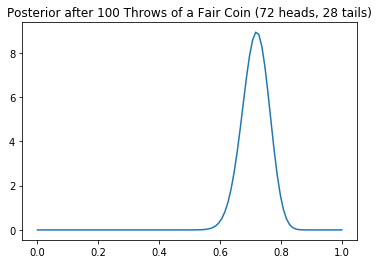

In [5]:
## initially assumed priors for heads and tails before the experiment  
prior_a = 1  
prior_b = 1  
  
a = prior_a + num_heads  
b = prior_b + num_tails  
rv = beta(a, b)  
  
x = np.linspace(0, 1, 100)  
plt.plot(x, rv.pdf(x))  
plt.title("Posterior after 100 Throws of a Fair Coin (%i heads, %i tails)" %(num_heads,num_tails))  
plt.show()  


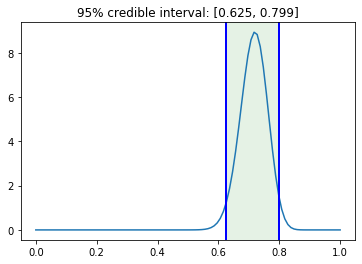

In [6]:
# The p-th quantile of the beta distribution.  
b_up = btdtri(a, b, 0.975)  
b_lo = btdtri(a, b, 0.025)  
  
plt.plot(x, rv.pdf(x))  
  
right_line = plt.axvline(b_up, lw=2, color='blue')  
left_line = plt.axvline(b_lo, lw=2, color='blue')  
fill = plt.axvspan(b_lo, b_up, alpha=0.1, color='green')  
      
plt.title("95%% credible interval: [%.3f, %.3f]"%(b_lo, b_up))  
plt.show()  


Text(0.5, 1.0, 'Gamma Density Function for a=5 and b=2.5')

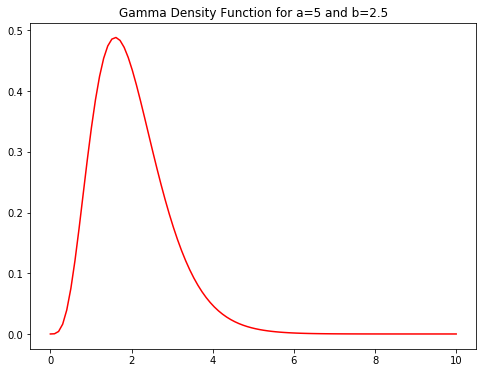

In [8]:
import scipy.stats as stats   
# Parameters of the prior gamma distribution.  
a = 5 # shape or alpha   
b = 2.5 # rate = 1/scale or beta   
  
x = np.linspace(start=0, stop=10, num=100)  
plt.figure(figsize=(8, 6))  
plt.plot(x, stats.gamma.pdf(x,a=a,scale=1/b), 'r-')  
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))  


In [9]:
import numpy as np  
import scipy.stats as stats  
  
np.random.seed(5)       # using seed to reproduce the results  
n = 100                 # number of samples.  
actual_lambda = 2.5     # true parameter.  
# sample array.  
y = np.random.poisson(lam=actual_lambda, size=n)  
print('The generated Poisson samples are:', y)  
print('\nThe mean of samples is %0.3f' %y.mean())   


The generated Poisson samples are: [2 5 1 2 3 3 1 1 3 0 3 1 4 2 4 2 1 4 5 1 2 1 2 5 2 3 0 2 4 4 2 4 2 8 2 1 2
 3 1 2 4 6 3 0 3 5 3 3 2 2 1 4 5 3 1 1 1 2 2 5 4 4 2 1 3 5 3 2 2 3 3 3 3 6
 3 1 2 1 3 0 1 0 3 5 3 2 2 2 0 1 1 6 7 1 2 4 5 2 3 4]

The mean of samples is 2.640


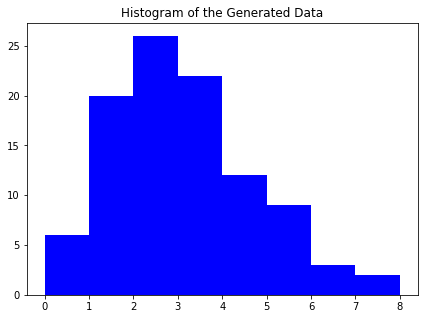

In [10]:
import matplotlib.pyplot as plt  
%matplotlib inline  
# Histogram of the sample data  
plt.figure(figsize=(7, 5))  
plt.hist(y, bins=8, color='b')  
plt.title('Histogram of the Generated Data')  
plt.show()  


In [11]:
import pymc3 as pm  
model = pm.Model()  
with model:  
    
    # Define the prior of the parameter lambda.  
    lam = pm.Gamma('lambda', alpha=a, beta=b)  
    # Define the likelihood function.  
    y_obs = pm.Poisson('y_obs', mu=lam, observed=y)  
    # Consider 1000 draws and 2 chains.  
    trace = pm.sample(draws=1000, chains=2)  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lambda]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 65 seconds.


d:\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
d:\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB9BADC188>],
      dtype=object)

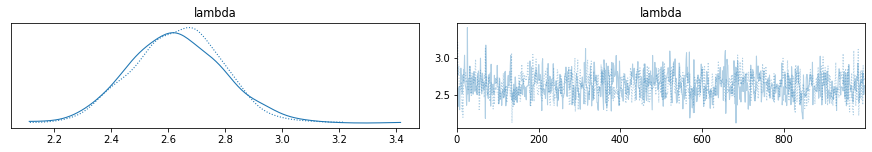

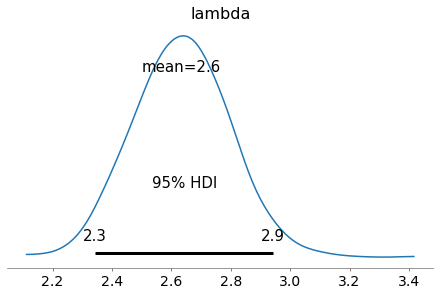

In [12]:
pm.traceplot(trace)  
  
pm.plot_posterior(trace,  hdi_prob=.95)    


## Naïve Bayes Classification

In [13]:
#Import Gaussian Naive Bayes model  
from sklearn.naive_bayes import GaussianNB  
  
from sklearn import preprocessing  
  
# Assigning features and label variables  
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',  
'Rainy','Sunny','Overcast','Overcast','Rainy']  
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']  
  
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']  
  
#creating label Encoder  
le = preprocessing.LabelEncoder()  
# Converting string labels into numbers.  
weather_encoded=le.fit_transform(weather)  
print ("Weather:",weather_encoded)  
  
# Encode temp and play columns to convert string labels into numbers  
temp_encoded=le.fit_transform(temp)  
label=le.fit_transform(play)  
print ("Temp:",temp_encoded)  
print ("Play:",label)  
  
#Combining features weather and temp in a single variable (list of tuples).  
  
features=np.column_stack((weather_encoded,temp_encoded))  
print ("Combined feature:",features)  
  
# Generate a model using naive bayes classifier in the following steps:  
# 1. Create naive bayes classifier  
# 2. Fit the dataset on classifier  
# 3. Perform prediction  
  
#Create a Gaussian Classifier  
model = GaussianNB()  
  
# Train the model using the training sets  
model.fit(features,label)  
  
#Predict Output for input 0:Overcast, 2:Mild  
  
predicted= model.predict([[0,2]])   
print ("Predicted Value:", predicted)  


Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Combined feature: [[2 1]
 [2 1]
 [0 1]
 [1 2]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 0]
 [1 2]
 [2 2]
 [0 2]
 [0 1]
 [1 2]]
Predicted Value: [1]
